#📌 Extracción

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Conociendo el conjunto de datos

In [57]:
df = pd.read_json('/content/TelecomX_Data.json')
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [59]:
df.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [60]:
df.isnull().sum()

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


## Comprobacion de incoherencias en los datos

In [61]:
df_phone    = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account  = pd.json_normalize(df['account'])
df_customer = pd.json_normalize(df['customer'])

In [62]:
df = pd.concat([df.drop(['phone','internet','account','customer'], axis=1),df_phone, df_internet, df_account, df_customer], axis=1)

In [63]:
df

,customerID,Churn,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,gender,SeniorCitizen,Partner,Dependents,tenure
0,0002-ORFBO,No,Yes,No,DSL,No,Yes,No,Yes,Yes,...,One year,Yes,Mailed check,65.60,593.3,Female,0,Yes,Yes,9
1,0003-MKNFE,No,Yes,Yes,DSL,No,No,No,No,No,...,Month-to-month,No,Mailed check,59.90,542.4,Male,0,No,No,9
2,0004-TLHLJ,Yes,Yes,No,Fiber optic,No,No,Yes,No,No,...,Month-to-month,Yes,Electronic check,73.90,280.85,Male,0,No,No,4
3,0011-IGKFF,Yes,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,...,Month-to-month,Yes,Electronic check,98.00,1237.85,Male,1,Yes,No,13
4,0013-EXCHZ,Yes,Yes,No,Fiber optic,No,No,No,Yes,Yes,...,Month-to-month,Yes,Mailed check,83.90,267.4,Female,1,Yes,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Yes,No,DSL,Yes,No,No,Yes,No,...,One year,No,Mailed check,55.15,742.9,Female,0,No,No,13
7263,9992-RRAMN,Yes,Yes,Yes,Fiber optic,No,No,No,No,No,...,Month-to-month,Yes,Electronic check,85.10,1873.7,Male,0,Yes,No,22
7264,9992-UJOEL,No,Yes,No,DSL,No,Yes,No,No,No,...,Month-to-month,Yes,Mailed check,50.30,92.75,Male,0,No,No,2
7265,9993-LHIEB,No,Yes,No,DSL,Yes,No,Yes,Yes,No,...,Two year,No,Mailed check,67.85,4627.65,Male,0,Yes,Yes,67


## Manejo de inconsistencias

In [64]:
df.columns = df.columns.str.lower().str.replace('.','_')
df.head()

,customerid,churn,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,...,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total,gender,seniorcitizen,partner,dependents,tenure
0,0002-ORFBO,No,Yes,No,DSL,No,Yes,No,Yes,Yes,...,One year,Yes,Mailed check,65.6,593.3,Female,0,Yes,Yes,9
1,0003-MKNFE,No,Yes,Yes,DSL,No,No,No,No,No,...,Month-to-month,No,Mailed check,59.9,542.4,Male,0,No,No,9
2,0004-TLHLJ,Yes,Yes,No,Fiber optic,No,No,Yes,No,No,...,Month-to-month,Yes,Electronic check,73.9,280.85,Male,0,No,No,4
3,0011-IGKFF,Yes,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,...,Month-to-month,Yes,Electronic check,98.0,1237.85,Male,1,Yes,No,13
4,0013-EXCHZ,Yes,Yes,No,Fiber optic,No,No,No,Yes,Yes,...,Month-to-month,Yes,Mailed check,83.9,267.4,Female,1,Yes,No,3


In [65]:
df.columns

Index(['customerid', 'churn', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod', 'charges_monthly', 'charges_total',
       'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure'],
      dtype='object')

In [66]:
df.dtypes

,0
customerid,object
churn,object
phoneservice,object
multiplelines,object
internetservice,object
onlinesecurity,object
onlinebackup,object
deviceprotection,object
techsupport,object
streamingtv,object


In [67]:
for col in df.columns:
    uniques = df[col].unique()
    print(f"Valores únicos de «{col}» ({len(uniques)}):\n{uniques}\n")


Valores únicos de «customerid» (7267):
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Valores únicos de «churn» (3):
['No' 'Yes' '']

Valores únicos de «phoneservice» (2):
['Yes' 'No']

Valores únicos de «multiplelines» (3):
['No' 'Yes' 'No phone service']

Valores únicos de «internetservice» (3):
['DSL' 'Fiber optic' 'No']

Valores únicos de «onlinesecurity» (3):
['No' 'Yes' 'No internet service']

Valores únicos de «onlinebackup» (3):
['Yes' 'No' 'No internet service']

Valores únicos de «deviceprotection» (3):
['No' 'Yes' 'No internet service']

Valores únicos de «techsupport» (3):
['Yes' 'No' 'No internet service']

Valores únicos de «streamingtv» (3):
['Yes' 'No' 'No internet service']

Valores únicos de «streamingmovies» (3):
['No' 'Yes' 'No internet service']

Valores únicos de «contract» (3):
['One year' 'Month-to-month' 'Two year']

Valores únicos de «paperlessbilling» (2):
['Yes' 'No']

Valores únicos de «paymentmethod» (4):
['Mailed che

In [68]:
df['charges_total'] = df['charges_total'].replace(r'^\s*$', np.nan, regex=True)

In [69]:
df['charges_total'] = pd.to_numeric(df['charges_total'], errors='coerce')
df['charges_monthly'] = pd.to_numeric(df['charges_monthly'], errors='coerce')

In [70]:
df = df.astype({
    'customerid': 'object',
    'churn': 'category',
    'phoneservice': 'category',
    'multiplelines': 'category',
    'internetservice': 'category',
    'onlinesecurity': 'category',
    'onlinebackup': 'category',
    'deviceprotection': 'category',
    'techsupport': 'category',
    'streamingtv': 'category',
    'streamingmovies': 'category',
    'contract': 'category',
    'paperlessbilling': 'category',
    'paymentmethod': 'category',
    'charges_monthly': 'float64',
    'charges_total': 'float64',
    'gender': 'category',
    'seniorcitizen': 'category',
    'partner': 'category',
    'dependents': 'category',
    'tenure': 'int64'
})


## Columna de cuentas diarias

In [71]:
df['cuentas_diarias'] = df['charges_monthly']/30

In [72]:
df['cuentas_diarias'] = df['cuentas_diarias'].round(2)

In [73]:
df.head()

,customerid,churn,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,...,paperlessbilling,paymentmethod,charges_monthly,charges_total,gender,seniorcitizen,partner,dependents,tenure,cuentas_diarias
0,0002-ORFBO,No,Yes,No,DSL,No,Yes,No,Yes,Yes,...,Yes,Mailed check,65.6,593.30,Female,0,Yes,Yes,9,2.19
1,0003-MKNFE,No,Yes,Yes,DSL,No,No,No,No,No,...,No,Mailed check,59.9,542.40,Male,0,No,No,9,2.00
2,0004-TLHLJ,Yes,Yes,No,Fiber optic,No,No,Yes,No,No,...,Yes,Electronic check,73.9,280.85,Male,0,No,No,4,2.46
3,0011-IGKFF,Yes,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,...,Yes,Electronic check,98.0,1237.85,Male,1,Yes,No,13,3.27
4,0013-EXCHZ,Yes,Yes,No,Fiber optic,No,No,No,Yes,Yes,...,Yes,Mailed check,83.9,267.40,Female,1,Yes,No,3,2.80


#🔧 Transformación

## Estandarización y transformación de datos

In [74]:
# estandarizar el si y no
service_cols = [
    'onlinesecurity','onlinebackup','deviceprotection',
    'techsupport','streamingtv','streamingmovies'
]
df[service_cols] = df[service_cols].replace('No internet service', 'No')

/tmp/ipython-input-74-3647847596.py:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[service_cols] = df[service_cols].replace('No internet service', 'No')


In [76]:
# rellenar valores por la mediana
df['charges_total'].fillna(df['charges_total'].median(), inplace=True)
df['charges_monthly'].fillna(df['charges_monthly'].median(), inplace=True)

/tmp/ipython-input-76-476704156.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['charges_total'].fillna(df['charges_total'].median(), inplace=True)
/tmp/ipython-input-76-476704156.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [78]:
bin_cols = [
    'churn','phoneservice','multiplelines','partner','dependents',
    'paperlessbilling'
] + service_cols

df[bin_cols] = df[bin_cols].applymap(lambda x: 1 if x=='Yes' else 0).astype('category')

/tmp/ipython-input-78-2557270898.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[bin_cols] = df[bin_cols].applymap(lambda x: 1 if x=='Yes' else 0).astype('category')


In [79]:
df.head()

,customerid,churn,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,...,paperlessbilling,paymentmethod,charges_monthly,charges_total,gender,seniorcitizen,partner,dependents,tenure,cuentas_diarias
0,0002-ORFBO,0,1,0,DSL,0,1,0,1,1,...,1,Mailed check,65.6,593.30,Female,0,1,1,9,2.19
1,0003-MKNFE,0,1,1,DSL,0,0,0,0,0,...,0,Mailed check,59.9,542.40,Male,0,0,0,9,2.00
2,0004-TLHLJ,1,1,0,Fiber optic,0,0,1,0,0,...,1,Electronic check,73.9,280.85,Male,0,0,0,4,2.46
3,0011-IGKFF,1,1,0,Fiber optic,0,1,1,0,1,...,1,Electronic check,98.0,1237.85,Male,1,1,0,13,3.27
4,0013-EXCHZ,1,1,0,Fiber optic,0,0,0,1,1,...,1,Mailed check,83.9,267.40,Female,1,1,0,3,2.80


#📊 Carga y análisis

## Analisis descriptivo

In [80]:
df.describe()

,charges_monthly,charges_total,tenure,cuentas_diarias
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,64.720098,2279.287581,32.346498,2.157292
std,30.129572,2267.178963,24.571773,1.004407
min,18.250000,18.800000,0.000000,0.610000
25%,35.425000,401.400000,9.000000,1.180000
50%,70.300000,1391.000000,29.000000,2.340000
75%,89.875000,3778.525000,55.000000,2.995000
max,118.750000,8684.800000,72.000000,3.960000


## Distribucion de evasion

In [81]:
print(df.columns.tolist())

['customerid', 'churn', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod', 'charges_monthly', 'charges_total', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure', 'cuentas_diarias']


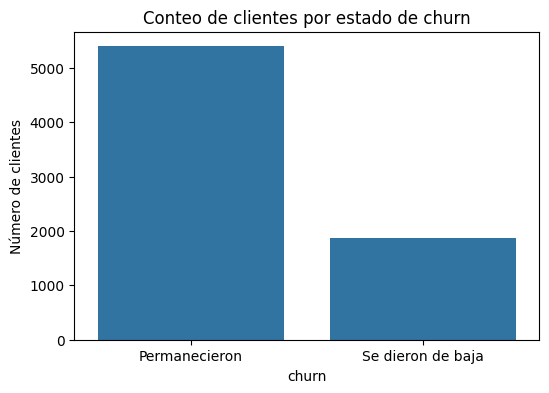

In [85]:
labels = ['Permanecieron','Se dieron de baja']
plt.figure(figsize=(6,4))
sns.countplot(x='churn', data=df)
plt.xticks([0,1], labels)
plt.ylabel('Número de clientes')
plt.title('Conteo de clientes por estado de churn')
plt.show()

## Recuento de evasión por variables categóricas

In [86]:
# Asegúrate de que churn sea 0/1
# pd.crosstab devuelve filas = niveles de la variable, columnas = churn (0/1)
def recuento_por(col):
    return pd.crosstab(df[col], df['churn'], margins=True).rename(columns={0:'Permanecieron', 1:'Se dieron de baja'})

# Ejemplo con género
print(recuento_por('gender'))

churn   Permanecieron  Se dieron de baja   All
gender                                        
Female           2653                939  3592
Male             2745                930  3675
All              5398               1869  7267


In [87]:
cat_cols = ['gender','contract','paymentmethod','internetservice','seniorcitizen','paperlessbilling']
tablas = {col: recuento_por(col) for col in cat_cols}

# Para ver la tabla de contract:
print(tablas['contract'])

churn           Permanecieron  Se dieron de baja   All
contract                                              
Month-to-month           2350               1655  4005
One year                 1353                166  1519
Two year                 1695                 48  1743
All                      5398               1869  7267


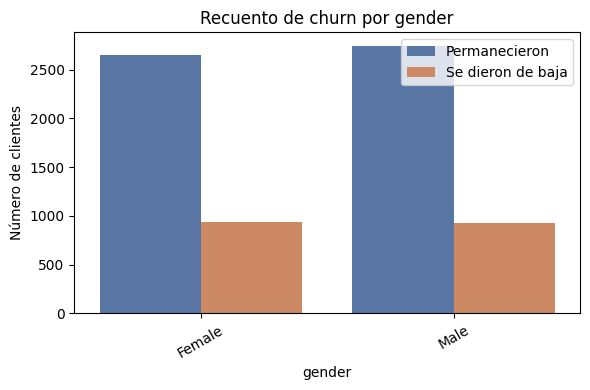

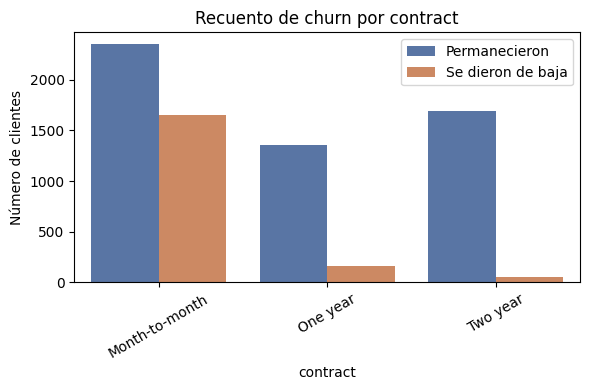

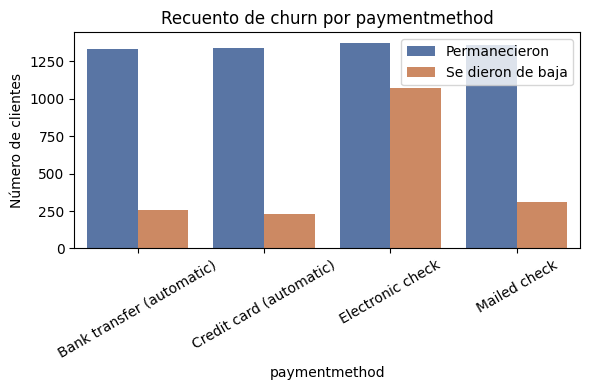

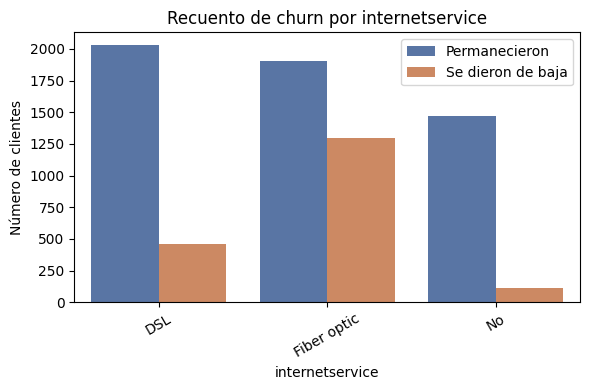

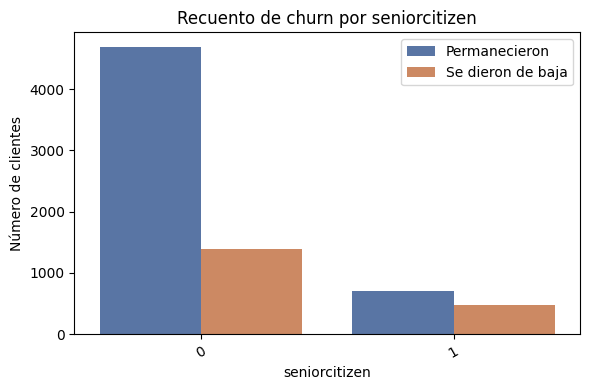

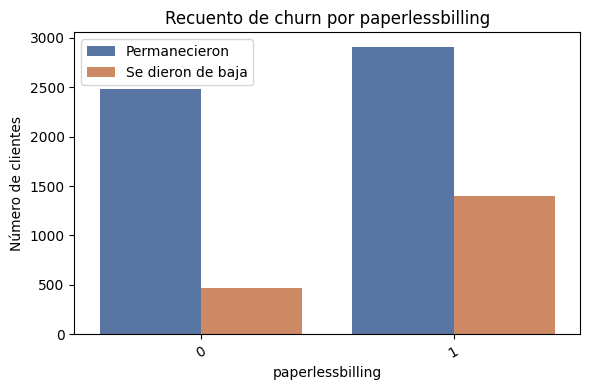

In [88]:
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='churn', data=df, palette='deep')
    plt.title(f'Recuento de churn por {col}')
    plt.legend(['Permanecieron','Se dieron de baja'])
    plt.ylabel('Número de clientes')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

## Conteo de evasión por variables numéricas

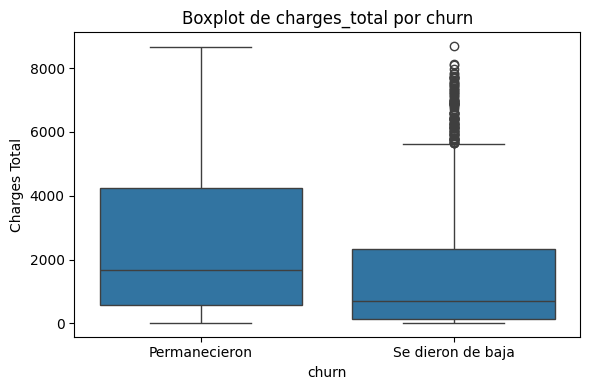

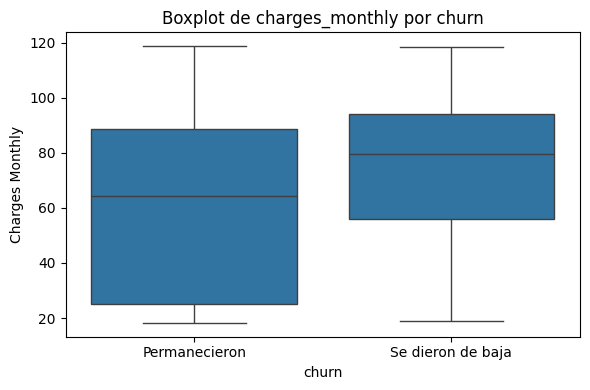

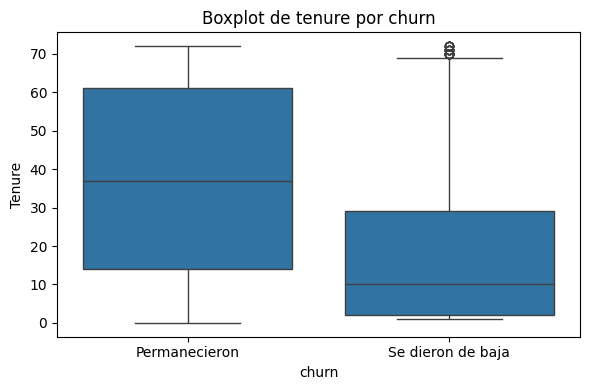

In [90]:
num_cols = ['charges_total','charges_monthly','tenure']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='churn', y=col, data=df)
    plt.xticks([0,1], ['Permanecieron','Se dieron de baja'])
    plt.ylabel(col.replace('_',' ').title())
    plt.title(f'Boxplot de {col} por churn')
    plt.tight_layout()
    plt.show()

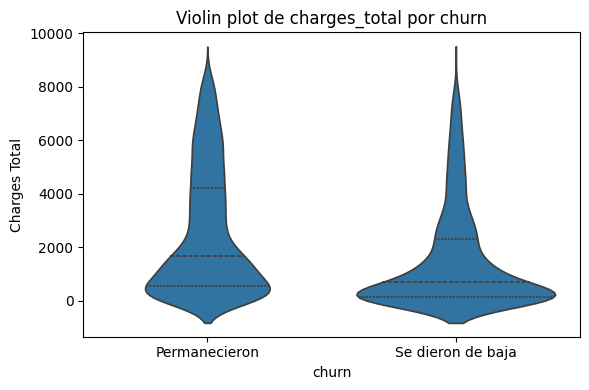

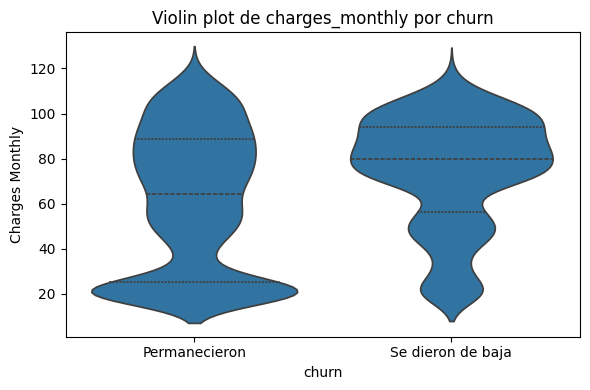

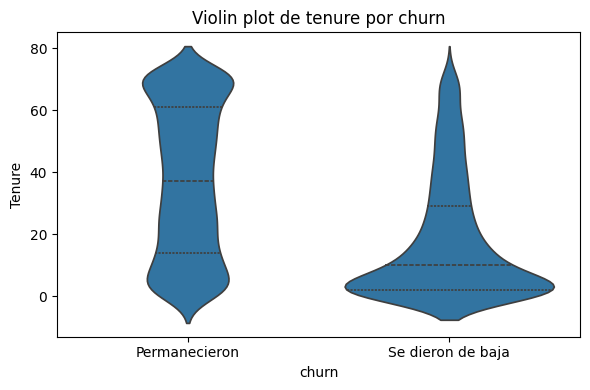

In [92]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.violinplot(x='churn', y=col, data=df, inner='quartile')
    plt.xticks([0,1], ['Permanecieron','Se dieron de baja'])
    plt.ylabel(col.replace('_',' ').title())
    plt.title(f'Violin plot de {col} por churn')
    plt.tight_layout()
    plt.show()


#📄Informe final